In [77]:
import pandas as pd
import matplotlib

In [78]:
data = "data/AEX.csv"
df = pd.read_csv(data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05,756.859985,757.880005,753.270020,755.760010,755.760010,57300
1,2023-04-06,757.450012,760.969971,756.719971,759.840027,759.840027,62200
2,2023-04-11,764.750000,765.760010,762.570007,763.320007,763.320007,58900
3,2023-04-12,761.770020,769.140015,758.229980,759.539978,759.539978,62400
4,2023-04-13,758.349976,761.020020,757.020020,760.570007,760.570007,53700
...,...,...,...,...,...,...,...
249,2024-03-27,878.849976,881.200012,878.549988,879.099976,879.099976,45265100
250,2024-03-28,881.849976,883.729980,881.049988,881.780029,881.780029,57532500
251,2024-04-02,888.539978,892.539978,880.320007,881.419983,881.419983,58447900
252,2024-04-03,883.270020,884.510010,879.469971,884.049988,884.049988,50944300


(<Axes: >, <Axes: >)

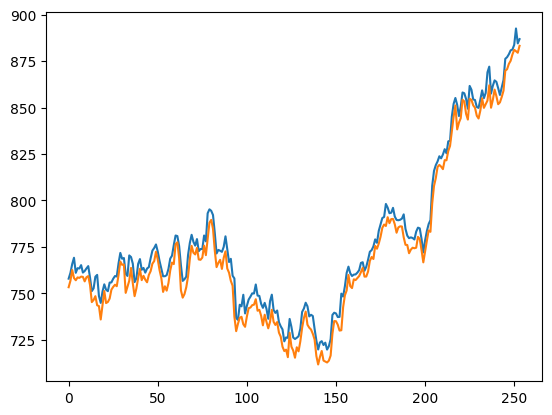

In [79]:
df["High"].plot(), df["Low"].plot()

Esto me sirve para el render

In [80]:
type(df["High"])

pandas.core.series.Series

In [81]:
def render():
    
    # Si el gráfico no ha sido creado todavía, crearlo y mostrar el primer punto
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Estado actual del mercado")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Precio")
    ax.plot([0], current_data["High"], 'ro')  # Crear un punto rojo
    plot_created = True


In [82]:
import matplotlib.pyplot as plt

760.969971
765.76001
769.140015
761.02002
763.51001


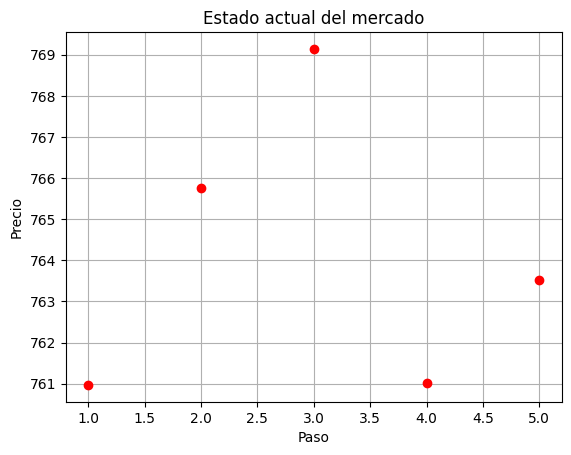

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(1,6):
    print(df["High"][i])
    ax.set_title("Estado actual del mercado")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Precio")
    ax.grid()
    ax.plot([i], df["High"][i], 'ro')  # Crear un punto rojo
    

# Shares implementation

In [84]:
import datetime

In [85]:
datetime.date.today().strftime("%d/%m/%Y")

'15/04/2024'

In [86]:
share = {
    "name": "AEX",
    "buy_date": "dia4",
    "buy_value": 10,
    "ID": "_".join(["AEX_" + "dia4"])
}
print(share)

{'name': 'AEX', 'buy_date': 'dia4', 'buy_value': 10, 'ID': 'AEX_dia4'}


In [87]:
share2 = {
    "name": "AEX",
    "buy_date": "dia1",
    "buy_value": 20,
    "ID": "_".join(["AEX_" + "dia1"])
}
share2

{'name': 'AEX', 'buy_date': 'dia1', 'buy_value': 20, 'ID': 'AEX_dia1'}

In [88]:
share3 = {
    "name": "AEX",
    "buy_date": "dia2",
    "buy_value": 40,
    "ID": "_".join(["AEX_" + "dia2"])
}
share3

{'name': 'AEX', 'buy_date': 'dia2', 'buy_value': 40, 'ID': 'AEX_dia2'}

In [89]:
share4 = {
    "name": "AEX",
    "buy_date": "hoy",
    "buy_value": 5,
    "ID": "_".join(["AEX_" + "hoy"])
}
share4

{'name': 'AEX', 'buy_date': 'hoy', 'buy_value': 5, 'ID': 'AEX_hoy'}

In [90]:
share1 = share

In [91]:
shares = [share1, share2, share3, share4]
shares

[{'name': 'AEX', 'buy_date': 'dia4', 'buy_value': 10, 'ID': 'AEX_dia4'},
 {'name': 'AEX', 'buy_date': 'dia1', 'buy_value': 20, 'ID': 'AEX_dia1'},
 {'name': 'AEX', 'buy_date': 'dia2', 'buy_value': 40, 'ID': 'AEX_dia2'},
 {'name': 'AEX', 'buy_date': 'hoy', 'buy_value': 5, 'ID': 'AEX_hoy'}]

In [92]:
for share in shares:
    print(share.get("buy_value"))

10
20
40
5


In [93]:
current_price = 15
price = 10

In [94]:
price < current_price

True

In [95]:
def sell_available():
    max_profit = float("-inf")
    for i, share in enumerate(shares):
        buy_price = share.get("buy_value")
        profit = current_price - buy_price
        if profit > max_profit:
            max_profit = profit
            max_profit_index = i
        # if buy_price < current_price:
        #     print(f'Se puede vender la acción {share["name"]} '
        #             f'comprada el día {share["buy_date"]} '
        #             f'por {share["buy_value"]}')
    return max_profit, max_profit_index
            

In [96]:
max_profit, max_profit_index = sell_available()

In [97]:
# Uso de la función
if max_profit_index is not None and max_profit_index < len(shares):
    print(f"La acción con mayor beneficio es la acción {shares[max_profit_index]['ID']} con un beneficio de {max_profit}")
else:
    print("No hay acciones disponibles para vender.")

La acción con mayor beneficio es la acción AEX_hoy con un beneficio de 10


In [98]:
max_profit_index

3

In [99]:
shares[3]["b"]

KeyError: 'b'

# Fechas


In [ ]:
def change_format(cad: str) -> str:
    date = datetime.datetime.strptime(cad, "%Y-%m-%d").strftime("%d-%m-%Y")
    date_split = date.split("-")
    
    return "-".join([d.lstrip("0") for d in date_split])

def str_to_date(date_str: str) -> datetime.datetime:
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

In [ ]:
date = str_to_date("2023-04-06")
date

datetime.datetime(2023, 4, 6, 0, 0)

In [ ]:
change_format("2023-04-06")

'6-4-2023'

# Subplots

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
fig = plt.figure()
ax = 

<Figure size 640x480 with 0 Axes>

In [ ]:
df_aux = df
df_aux

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05,756.859985,757.880005,753.270020,755.760010,755.760010,57300
1,2023-04-06,757.450012,760.969971,756.719971,759.840027,759.840027,62200
2,2023-04-11,764.750000,765.760010,762.570007,763.320007,763.320007,58900
3,2023-04-12,761.770020,769.140015,758.229980,759.539978,759.539978,62400
4,2023-04-13,758.349976,761.020020,757.020020,760.570007,760.570007,53700
...,...,...,...,...,...,...,...
249,2024-03-27,878.849976,881.200012,878.549988,879.099976,879.099976,45265100
250,2024-03-28,881.849976,883.729980,881.049988,881.780029,881.780029,57532500
251,2024-04-02,888.539978,892.539978,880.320007,881.419983,881.419983,58447900
252,2024-04-03,883.270020,884.510010,879.469971,884.049988,884.049988,50944300


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [103]:
columns = df.columns.drop(["Date", "Volume", "Adj Close"])
columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [104]:
for index, column in enumerate(columns):
    print(" ".join([str(index), str(column)]))

0 Open
1 High
2 Low
3 Close


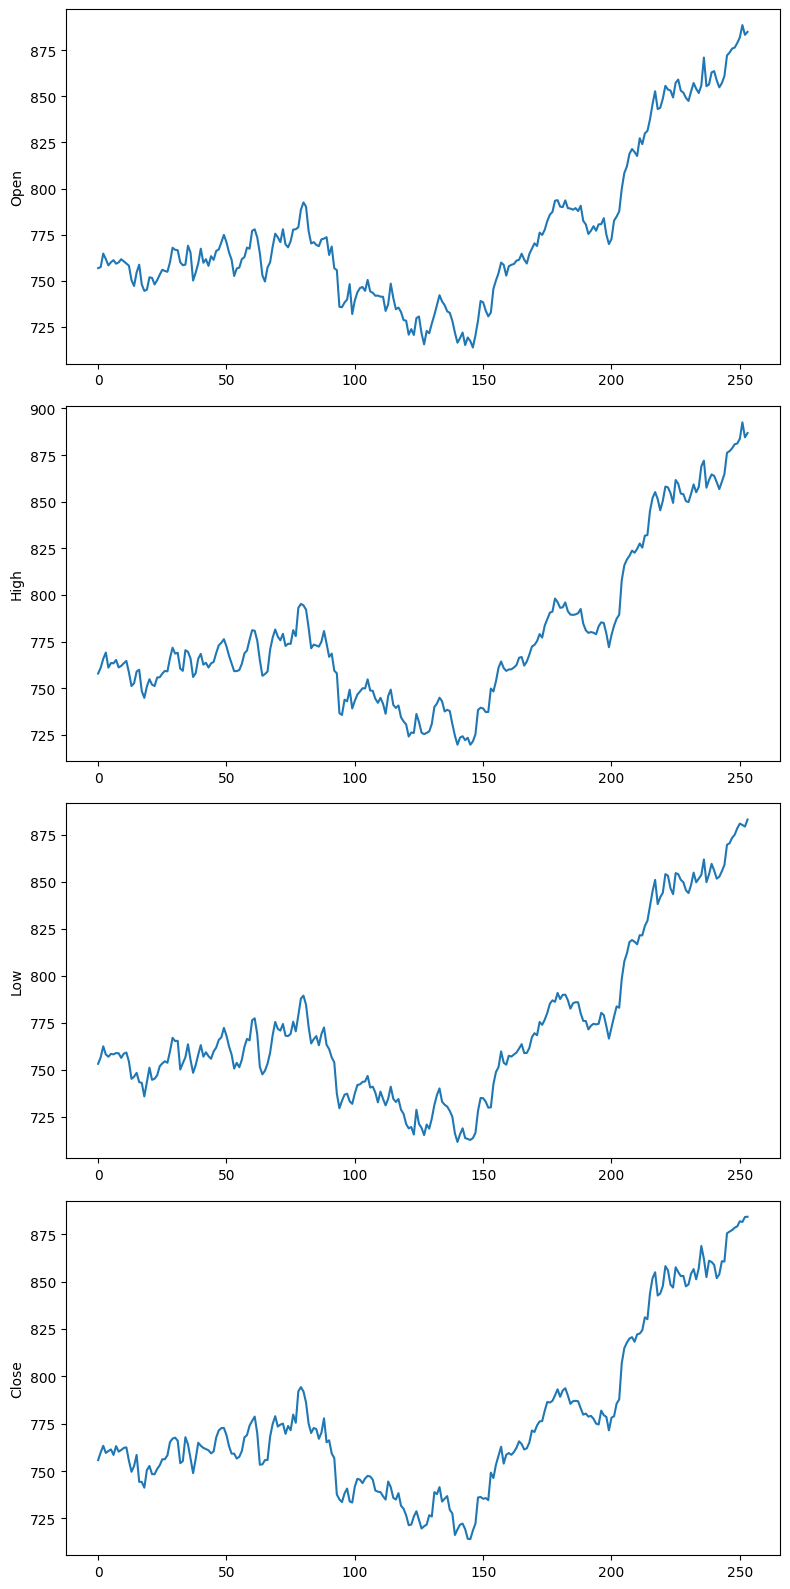

In [105]:

# Suponiendo que 'df' es tu DataFrame
# for column in columns:
#    fig, ax = plt.subplots()
#    ax.plot(df[column])
#    ax.set_ylabel(column)
# plt.show()

fig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns)*4))

for idx, column in enumerate(columns):
    axes[idx].plot(df[column])
    axes[idx].set_ylabel(column)

plt.tight_layout()
plt.show()



In [106]:
axes = ["ax" + str(index + 1) for index in range(n)]
axes

['ax1', 'ax2', 'ax3', 'ax4', 'ax5']

## Legend de colores

In [111]:
COLORS = {0: 'k',  # Negro para HOLD
            1: 'g',  # Verde para BUY
            2: 'r'}  # Rojo para SELL
COLORS

{0: 'k', 1: 'g', 2: 'r'}

In [112]:

ACTIONS = {0: 'HOLD',
        1: 'BUY',
        2: 'SELL'}
ACTIONS

{0: 'HOLD', 1: 'BUY', 2: 'SELL'}

In [116]:
legend_labels = [f"{COLORS[color]} = {ACTIONS.values()[color]}" for color in COLORS]
legend_labels

TypeError: 'dict_values' object is not subscriptable

In [118]:
legend_labels = [f"{COLORS[color]} = {list(ACTIONS.values())[color]}" for color in COLORS]
legend_labels

['k = HOLD', 'g = BUY', 'r = SELL']

In [1]:
# {key: {key: value} for key, value in zip(keys, close)}
x = {'^AEX': {'^AEX': 778.8900146484375}, 'TSLA': {'TSLA': 212.19000244140625}, 'AMZN': {'AMZN': 155.33999633789062}}
x

{'^AEX': {'^AEX': 778.8900146484375},
 'TSLA': {'TSLA': 212.19000244140625},
 'AMZN': {'AMZN': 155.33999633789062}}

In [2]:
x.keys()

dict_keys(['^AEX', 'TSLA', 'AMZN'])

In [3]:
x.values()

dict_values([{'^AEX': 778.8900146484375}, {'TSLA': 212.19000244140625}, {'AMZN': 155.33999633789062}])

In [7]:
x.values()

dict_values([{'^AEX': 778.8900146484375}, {'TSLA': 212.19000244140625}, {'AMZN': 155.33999633789062}])

In [10]:
x.values()["TLSA"]

TypeError: 'dict_values' object is not subscriptable

# Optim action

In [5]:
current_price = [778.8900146484375, 212.19000244140625, 155.33999633789062]
last_price = [728.8900146484375, 213.19000244140625, 125.33999633789062]

In [6]:
diff = [current - last for current, last in zip(current_price, last_price)]
diff

[50.0, -1.0, 30.0]

In [7]:
[1 if x > 0 else 2 for x in diff]

[1, 2, 1]

# Colores como lista

In [8]:
COLORS = {0: 'k', 1: 'g', 2: 'r'}
COLORS

{0: 'k', 1: 'g', 2: 'r'}

In [9]:
ACTIONS = {0: 'HOLD', 1: 'BUY', 2: 'SELL'}
ACTIONS

{0: 'HOLD', 1: 'BUY', 2: 'SELL'}

In [ ]:
for action in

# Subplots

In [1]:
import matplotlib.pyplot as plt

In [2]:
current_data = {'^AEX': 778.8900146484375, 'TSLA': 212.19000244140625, 'AMZN': 155.33999633789062}
current_data

{'^AEX': 778.8900146484375,
 'TSLA': 212.19000244140625,
 'AMZN': 155.33999633789062}

In [3]:
columns = 3
columns


3

In [4]:
fig, axes = plt.subplots(columns, 1, figsize=(8, columns*4))

In [ ]:
for idx, column in enumerate(current_data):
    axes[idx].plot(current_data[column], 'o', label="test")
    

In [ ]:
import matplotlib.pyplot as plt
current_data = {'^AEX': 778.8900146484375, 'TSLA': 212.19000244140625, 'AMZN': 155.33999633789062}
current_data
columns = 3
columns

fig, axes = plt.subplots(columns, 1, figsize=(8, columns*4))
for idx, column in enumerate(current_data):
    axes[idx].plot(current_data[column], 'o', label="test")
    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg')  # Intenta con diferentes backends como 'Qt5Agg', 'TkAgg', 'GTK3Agg', etc.

current_data = {'^AEX': 778.8900146484375, 'TSLA': 212.19000244140625, 'AMZN': 155.33999633789062}
columns = 3

fig, axes = plt.subplots(columns, 1, figsize=(8, columns*4))  # Corregir el número de filas a "columns"
axes = axes.ravel()  # Aplanar la matriz de ejes para iterar fácilmente sobre ellos

for idx, (column_name, value) in enumerate(current_data.items()):  # Iterar sobre el nombre de la columna y su valor
    axes[idx].plot(value, 'o', label=column_name)  # Usar el valor como datos para trazar el gráfico
    axes[idx].legend()  # Mostrar la leyenda en cada subgráfico

plt.tight_layout()  # Ajustar el diseño de los subgráficos para que no se superpongan
plt.show()  # Mostrar el gráfico


In [1]:


fig, axes = plt.subplots(columns, figsize=(8, columns*4))  # Corregir el número de filas a "columns"
axes = axes.ravel()  # Aplanar la matriz de ejes para iterar fácilmente sobre ellos

for idx, (column_name, value) in enumerate(current_data.items()):  # Iterar sobre el nombre de la columna y su valor
    axes[idx].plot(value, 'o', label=column_name)  # Usar el valor como datos para trazar el gráfico
    axes[idx].legend()  # Mostrar la leyenda en cada subgráfico

plt.tight_layout()  # Ajustar el diseño de los subgráficos para que no se superpongan
plt.show()  # Mostrar el gráfico


In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:

current_data = {'^AEX': 778.8900146484375, 'TSLA': 212.19000244140625, 'AMZN': 155.33999633789062}
columns = 3


In [3]:
matplotlib.use('Qt5Agg')  # Intenta con diferentes backends como 'Qt5Agg', 'TkAgg', 'GTK3Agg', etc.

fig, axes = plt.subplots(3, figsize=(8, 12))  # Corregir el número de filas a "columns"

In [4]:
#fig, axes = plt.subplots(columns, figsize=(8, columns*4))  # Corregir el número de filas a "columns"
#axes = axes.ravel()  # Aplanar la matriz de ejes para iterar fácilmente sobre ellos

for idx, (column_name, value) in enumerate(current_data.items()):  # Iterar sobre el nombre de la columna y su valor
    axes[idx].plot(value, 'o', label=column_name)  # Usar el valor como datos para trazar el gráfico
    axes[idx].legend()  # Mostrar la leyenda en cada subgráfico


In [5]:
plt.show()
